# Curso introductorio de Machine Learning - Trabajo para Inscripcion

## Tema Elegico: Opción 2: El mercado financiero

*Estudio comparativo del desempeño financiero de distintas empresas*

## Autor: Claudio Collado 

## Aclaraciones Preliminares - Consideraciones Generales

Para el desarrollo del desafio tuve en consideracion los siguientes aspectos:

   1. El Notebook contiene comentarios y explicaciones para facilitar su entendimiento
   
   2. Las entradas de datos al programa por parte del Usuario lo simplifique por medio de especificaciones en forma de  variables o listas. Esto deja en manos del usuario la responsabilidad de introducir el formato y tipo de dato correcto en cada caso, el cual es indicado para evitar errores al momento de ejecucion.
   
       Esto se puede mejorar solicitando al Usuario el ingreso de datos por medio de la sentencia input() y la evaluacion por medio de try / except
       
       
   3. Se definieron funciones lo mas sencillas posibles. No se incluyo el docstring ya que previamente en la lectura del notebook se aclara todo lo necesario
   
   
   4. Todo lo realizado es **MEJORABLE** y viene muy bien como ejercicio personal para seguir aprendiendo. Cualquier comentario que quieran realizar como devolucion es muy util para mejorar!

# Librerias

Importo las librerias que voy a utilizar durante el desarrollo del Desafio

In [1]:
import numpy as np #NumPy
import pandas as pd #Pandas
import matplotlib.pyplot as plt #Matplotplib - Pyplot
import seaborn as sns #Seaborn

## Item N°1

**Realizar un grafico del valor de las acciones diarias de las compañias Amazon y Google utilizando dos tipos de lineas distintos. Colocar como una entrada del programa el intervalo de fechas que se desea gráficar** 

Para este item utilizo los datos que se encuentran en archivos *.csv que fueron descargados y guardados en igual carpeta donde se encuentra el Notebook. Esto se podria mejorar realizando la lectura de los datos desde algun sitio, por ejemplo Yahoo Finance

In [2]:
#Realizo la lectura de los archivos csv y la asignacion a DataFrames

df_google = pd.read_csv('GOOGLE.csv')
df_amazon = pd.read_csv('AMZN.csv')

In [3]:
#Observo la composicion del DataFrame de Google

df_google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-11-04,269.390259,271.731476,267.208435,269.156128,269.156128,4682800
1,2009-11-05,270.730225,273.858521,270.316772,273.300598,273.300598,3709100
2,2009-11-06,272.837341,274.859772,271.731476,274.521027,274.521027,3667000
3,2009-11-09,276.687897,280.239594,276.080170,280.204712,280.204712,5319500
4,2009-11-10,280.314301,283.328003,279.950684,282.321777,282.321777,4478200


In [4]:
#Observo la composicion del DataFrame de Amazon

df_amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-11-04,119.000000,119.250000,116.760002,117.099998,117.099998,7617500
1,2009-11-05,117.459999,120.949997,116.250000,120.610001,120.610001,9086800
2,2009-11-06,123.000000,126.980003,122.669998,126.199997,126.199997,13226000
3,2009-11-09,127.110001,128.320007,125.589996,126.669998,126.669998,8624200
4,2009-11-10,126.800003,130.610001,126.000000,130.149994,130.149994,10529300


En ambos DataFrame´s se dispone, para graficar en forma comparativa, los siguientes atributos:

Precios:

    a. Open
    b. High
    c. Low
    d. Close
    e. Adj Close
    
Volumen operado:

    f. Volume

Considero que es conveniente utilizar el atributo `Adj Close`, el cual corresponde al precio de cierre ajustado por divisiones y distribuciones de dividendos. Aun asi como entrada para el usuario es posible especificar cualquier opcion de las mencionadas anteriormeente


Defino una funcion `grafico_comparativo` que toma como parametros:

   1. **atributo**: La columna del DataFrame que se quiere graficar. Se especifica por medio de un String que se encuentra entre los siguientes disponibles:['Open','High','Low','Close','Adj Close','Volume']
   2. **start**: Fecha de Inicio del grafico. Se especifica un String con formato 'año-mes-dia' (ejemplo: '2010-11-03')
   3. **end**: Fecha de Fin del grafico. Se especifica un String con formato 'año-mes-dia' (ejemplo: '2018-11-07')

In [5]:
def grafico_comparativo(atributo,start,end):
    
    start_util = int(df_google[df_google['Date'] == start].index.values) #Inidice de Inicio
    end_util = int(df_google[df_google['Date'] == end].index.values)     #Indice de Fin

    graf_google = df_google.iloc[start_util:end_util]  #Slice del DataFrame Google
    graf_amazon = df_amazon.iloc[start_util:end_util]  #Slice del DataFrame Amazon

    #Datos para Graficar
    eje_x = graf_google.index
    google = graf_google[atributo]
    amazon = graf_amazon[atributo]

    #Grafico
    fig, ax = plt.subplots(figsize=(18, 12))
    ax.plot(eje_x,google,label='Google')
    ax.plot(eje_x,amazon,label='Amazon')
    ax.set_title("Grafico del atributo '" + atributo + "' para las acciones de Google y Amazon",fontsize=26)
    ax.legend(loc='best',fontsize=22)
    ax.set_xlabel('Dias',fontsize=22)
    ax.set_ylabel('Valor de la accion [U$S]',fontsize=22)
    fig.tight_layout()

**Ingreso de Datos por parte del Usuario**

In [6]:
#Datos que deben ser especificados por el Usuario

start = '2010-11-03'    #Fecha de Inicio (Es responsabilidad del Usuario introducir una FECHA VALIDA)
end = '2018-11-07'      #Fecha de Fin (Es responsabilidad del Usuario introducir una FECHA VALIDA)
atributo = 'Adj Close'  #Atributo que se quiere graficar (Es responsabilidad del Usuario introducir un ATRIBUTO VALIDO)

Realizo la llamada a la funcion con los datos introducidos por el Usuario y obtengo el grafico correspondiente

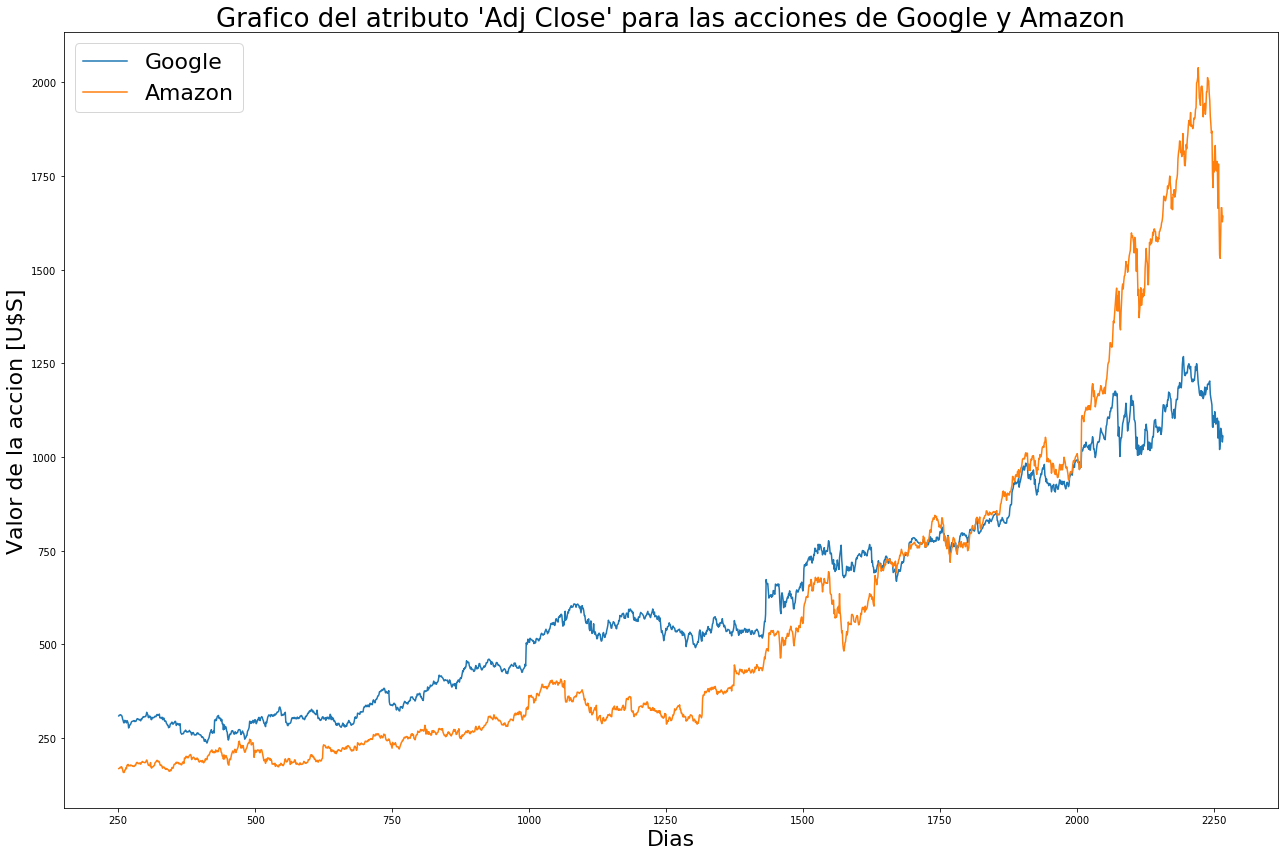

In [7]:
grafico_comparativo(atributo,start,end)

## Item N°2


**Encontrar los puntos donde se cruzan los dos gráficos y marcarlos con puntos** 

Defino una funcion `puntos` que toma como parametros:

   1. **atributo**: La columna del DataFrame que se quiere graficar. Se especifica por medio de un String que se encuentra entre los siguientes disponibles:['Open','High','Low','Close','Adj Close','Volume']
   2. **start**: Fecha de Inicio del grafico. Se especifica un String con formato 'año-mes-dia' (ejemplo: '2010-11-03')
   3. **end**: Fecha de Fin del grafico. Se especifica un String con formato 'año-mes-dia' (ejemplo: '2018-11-07')

In [8]:
def puntos(atributo,start,end):

    start_util = int(df_google[df_google['Date'] == start].index.values) #Inidice de Inicio
    end_util = int(df_google[df_google['Date'] == end].index.values)     #Indice de Fin

    graf_google = df_google.iloc[start_util:end_util]  #Slice del DataFrame Google
    graf_amazon = df_amazon.iloc[start_util:end_util]  #Slice del DataFrame Amazon
    
  
    #Datos para Graficar
    x = np.array(graf_google.index) 
    f = np.array(graf_google[atributo])
    g = np.array(graf_amazon[atributo])
    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
    
    #Fechas que luego guardo como archivo Excel
    fecha = df_google.iloc[idx]
    
    #Grafico
    fig, ax = plt.subplots(figsize=(18, 12))
    ax.plot(x,f,label='Google')
    ax.plot(x,g,label='Amazon')
    plt.plot(x[idx], f[idx], 'ko',label='Puntos de Interseccion')
    ax.set_title("Grafico del atributo '" + atributo + "' para las acciones de Google y Amazon",fontsize=26)
    ax.legend(loc='best',fontsize=22)
    ax.set_xlabel('Dias',fontsize=22)
    ax.set_ylabel('Valor de la accion [U$S]',fontsize=22)
    fig.tight_layout()
    
    return fecha #Retorno esta variable que es donde almaceceno las fechas donde ocurrieron los cruces

**Ingreso de Datos por parte del Usuario**

In [9]:
#Datos que deben ser especificados por el Usuario

start = '2009-11-04'    #Fecha de Inicio (Es responsabilidad del Usuario introducir una FECHA VALIDA)
end = '2018-11-01'      #Fecha de Fin (Es responsabilidad del Usuario introducir una FECHA VALIDA)
atributo = 'Adj Close'  #Atributo que se quiere graficar (Es responsabilidad del Usuario introducir un ATRIBUTO VALIDO)

Realizo la llamada a la funcion con los datos introducidos por el Usuario y obtengo el grafico correspondiente.

La llamada a la funcion la almaceno en la variable 'cruces' que luego utilizo para guardar las fechas donde se produjeron esos cruces (Ver Item N°3)

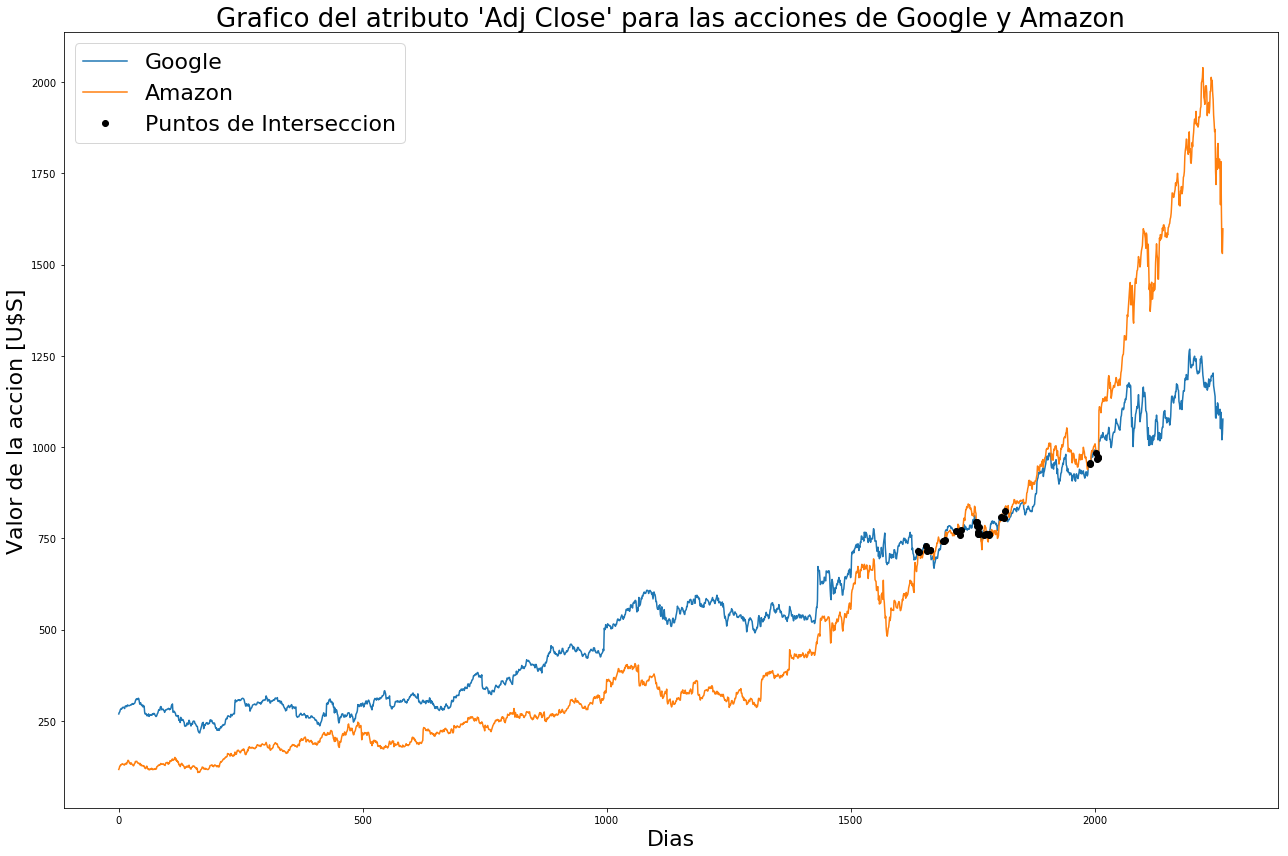

In [10]:
cruces = puntos(atributo,start,end)

## Item N°3

**Almacenar en un archivo de excel las fechas donde ocurrieron las intersecciones**

Utilizo lo realizado previamente en el Item N°2. Se guarda el archivo 'fechas.xlsx' en directorio local

In [11]:
#Las Fechas son almacenadas en el archivo fechas.xlsx

cruces['Date'].to_excel("fechas.xlsx")

## Item N°4

**Armar un programa donde se analize la información de ciertas empresas (entrada del usuario) y se las gráfique comparativamente**

Utilizo los datos proporcionados por el sitio Yahoo Finance. Obtengo los datos por medio de la libreria `yfinance`. A modo de ejemplo las empresas de las cuales se podria obtener datos tenemos:

   1. 'MSFT':'Microsoft'
   2. 'AAPL':'Apple'
   3. 'AMZN':'Amazon'
   4. 'FB':'Facebook'
   5. 'BRK.B':'Berkshire Hathaway B'
   6. 'GOOGL':'Alphabet Inc A'
   7. 'JPM':'JP Morgan Chase & Co'
   8. 'JNJ':'Jhonson & Jhonson'

In [12]:
#Importo la libreria yfinance que voy a utilizar para obtener los datos

import yfinance as yf

Defino una funcion `analisis_empresas` que toma como parametros:

   1. **lista_empresas**: Se deben especificar los codigos de las empresas que se quiere analizar por medio de una lista. Ejemplo: lista_empresas = ['SPY','MSFT','AAPL']. Es importante que el usuario conozca de antemano el codigo de las empresas que quiere analizar
   2. **atributo**: La columna del DataFrame que se quiere graficar. Se especifica por medio de un String que se encuentra entre los siguientes disponibles:['Open','High','Low','Close','Adj Close','Volume']
   3. **start**: Fecha de Inicio del grafico. Se especifica un String con formato 'año-mes-dia' (ejemplo: '2010-11-03')
   4. **end**: Fecha de Fin del grafico. Se especifica un String con formato 'año-mes-dia' (ejemplo: '2018-11-07')

In [13]:
def analisis_empresas(lista_empresas,atributo,start,end):

    df_final = pd.DataFrame()
    
    for i in lista_empresas:
        data = yf.download(i, start, end)
        df_interm = data[atributo]
        df_final = pd.concat([df_final,df_interm], axis=1)
    
    df_final.columns=lista_empresas
    
    plt.figure()
    df_final.plot(figsize=(18,12))
    plt.legend(loc='best',fontsize=20)
    plt.title("Grafico de '" + atributo + "'", fontsize=26)
    plt.xlabel('Años',fontsize=20)
    plt.ylabel('Valor de la accion [U$S]',fontsize=22)
    plt.show()

**Ingreso de Datos por parte del Usuario**

In [14]:
#Datos que deben ser especificados por el Usuario

start="2008-01-01" #Fecha de Inicio (Es responsabilidad del Usuario introducir una FECHA VALIDA)
end="2018-01-30"   #Fecha de Fin (Es responsabilidad del Usuario introducir una FECHA VALIDA)
lista_empresas = ['SPY','MSFT','AAPL'] #Lista de Empresas a considerar (Es responsabilidad del Usuario introducir una EMPRESA VALIDA)
atributo = 'Adj Close' #Atributo que se quiere graficar (Es responsabilidad del Usuario introducir un ATRIBUTO VALIDO)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Figure size 432x288 with 0 Axes>

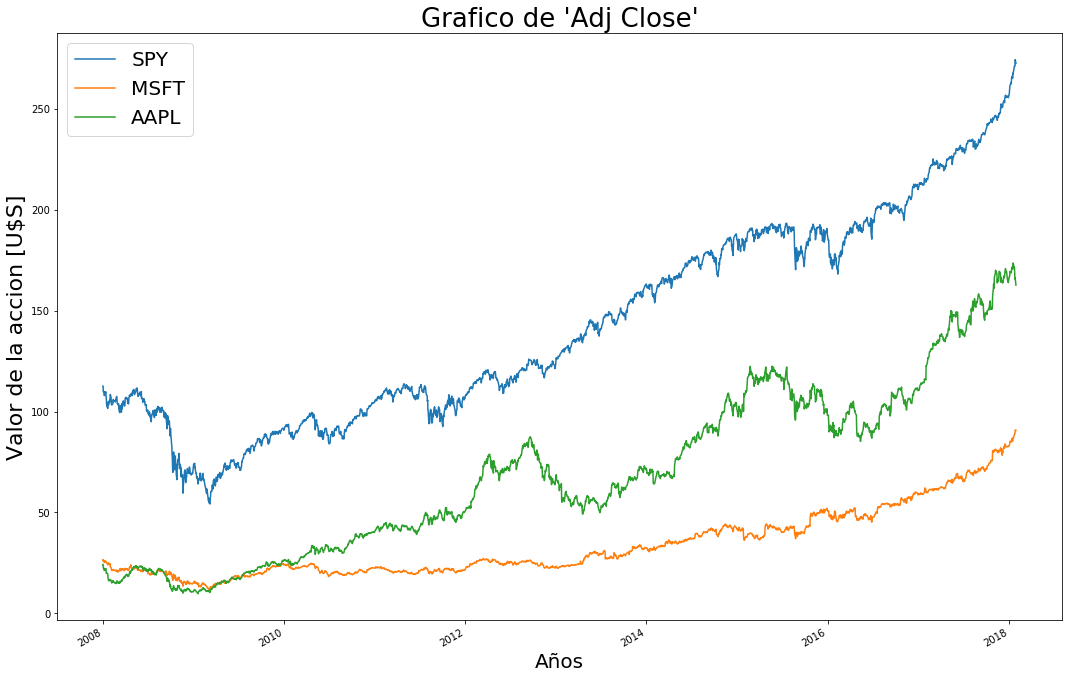

In [15]:
analisis_empresas(lista_empresas,atributo,start,end)

## Item N°5

**Gráficar la derivada discreta de los valores de bolsa de cada empresa, esto es, la diferencia entre el valor actual y el anterior para cada punto en el tiempo**

Defino una funcion `derivada_discreta` que toma como parametros:

   1. **lista_empresas**: Se deben especificar los codigos de las empresas que se quiere analizar por medio de una lista. Ejemplo: lista_empresas = ['SPY','MSFT','AAPL']. Es importante que el usuario conozca de antemano el codigo de las empresas que quiere analizar
   2. **atributo**: La columna del DataFrame que se quiere graficar. Se especifica por medio de un String que se encuentra entre los siguientes disponibles:['Open','High','Low','Close','Adj Close']
   3. **start**: Fecha de Inicio del grafico. Se especifica un String con formato 'año-mes-dia' (ejemplo: '2010-11-03')
   4. **end**: Fecha de Fin del grafico. Se especifica un String con formato 'año-mes-dia' (ejemplo: '2018-11-07')

In [16]:
def derivada_discreta(lista_empresas,atributo,start,end):

    df_final = pd.DataFrame()
    for i in lista_empresas:
        data = yf.download(i, start, end)
        df_interm = data[atributo]
        df_final = pd.concat([df_final,df_interm], axis=1)
    
    #Calculo la diferencia entre valores contiguos de filas
    df_final = df_final.diff()
    df_final.columns=lista_empresas
    
    #Grafico
    plt.figure()
    df_final.plot(subplots=True,figsize=(18,12))
    plt.show()

**Ingreso de Datos por parte del Usuario**

In [17]:
#Datos que deben ser especificados por el Usuario

start="2008-01-01" #Fecha de Inicio (Es responsabilidad del Usuario introducir una FECHA VALIDA)
end="2018-01-30"   #Fecha de Fin (Es responsabilidad del Usuario introducir una FECHA VALIDA)
lista_empresas = ['SPY','MSFT','AAPL'] #Lista de Empresas a considerar (Es responsabilidad del Usuario introducir una EMPRESA VALIDA)
atributo = 'Adj Close' #Atributo que se quiere graficar (Es responsabilidad del Usuario introducir un ATRIBUTO VALIDO)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Figure size 432x288 with 0 Axes>

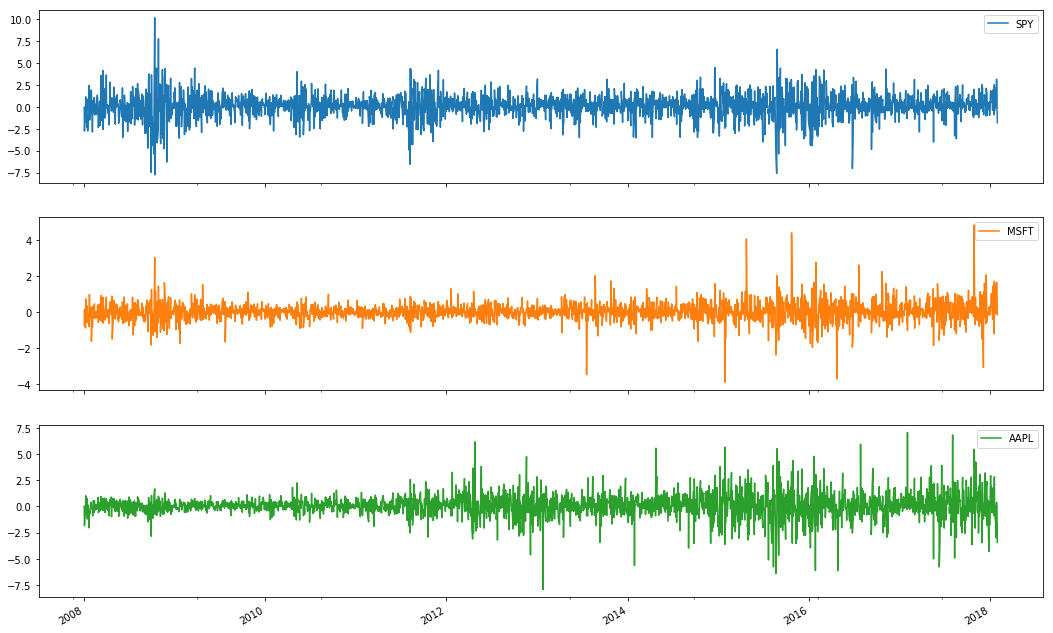

In [18]:
derivada_discreta(lista_empresas,atributo,start,end)